In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() 
from IPython.display import display

In [2]:
train = pd.read_csv('titanic-train.csv')
test = pd.read_csv('titanic-test.csv')
titanic = pd.read_csv('titanic.csv')

In [3]:
all_data = [titanic]

In [4]:
for dataset in all_data:
    dataset.loc[ dataset['Age'] <= 12, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 20), 'Age'] = 1,
    dataset.loc[ dataset['Age'] > 20, 'Age'] = 2

In [5]:
sex_mapping = {"male": 0, "female": 1}
for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [6]:
for dataset in all_data:
    dataset.loc[ dataset['SiblingSpouse'] == 0, 'SiblingSpouse'] = 0,
    dataset.loc[ dataset['SiblingSpouse'] > 0, 'SiblingSpouse'] = 1,
    dataset.loc[ dataset['ParentChild'] == 0, 'ParentChild'] = 0,
    dataset.loc[ dataset['ParentChild'] > 0, 'ParentChild'] = 1,

In [7]:
titanic.head(40)

,PassengerId,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChild
0,1,0,3,0,2,1.0,0
1,2,1,1,1,2,1.0,0
2,3,1,3,1,2,0.0,0
3,4,1,1,1,2,1.0,0
4,5,0,3,0,2,0.0,0
5,6,0,1,0,2,0.0,0
6,7,0,3,0,0,1.0,1
7,8,1,3,1,2,0.0,1
8,9,1,2,1,1,1.0,0
9,10,1,3,1,0,1.0,1


In [8]:
titanic.tail(23)

,PassengerId,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChild
40,41,0,1,0,2,0.0,1
41,42,1,2,1,2,0.0,0
42,43,0,3,0,2,0.0,0
43,44,1,2,1,0,1.0,1
44,45,0,3,0,0,1.0,1
45,46,0,3,0,2,0.0,0
46,47,0,1,0,2,1.0,0
47,48,0,3,0,0,1.0,1
48,49,1,2,1,2,0.0,0
49,50,0,3,0,1,0.0,0


In [9]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [10]:
titanic.replace(np.NaN, 0)

,PassengerId,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChild
0,1,0,3,0,2,1.0,0
1,2,1,1,1,2,1.0,0
2,3,1,3,1,2,0.0,0
3,4,1,1,1,2,1.0,0
4,5,0,3,0,2,0.0,0
5,6,0,1,0,2,0.0,0
6,7,0,3,0,0,1.0,1
7,8,1,3,1,2,0.0,1
8,9,1,2,1,1,1.0,0
9,10,1,3,1,0,1.0,1


In [11]:
titanic = titanic.fillna(titanic.mean())

In [12]:
target = titanic['Survived']
data = titanic.drop('Survived', axis=1)

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=(63-40)/63, random_state=1) # 70% training and 30% test

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model

After the prediction , we make a confusion matrix based on the prediction result and target.

In [17]:
# making a confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[10,  2],
       [ 7,  4]])

The accuracy fo the decision tree model:

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6086956521739131


Now we got a classification rate of 60.9%. We can improve this accuracy by tuning the parameters in the Decision Tree Algorithm.

### Visualization

In [17]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

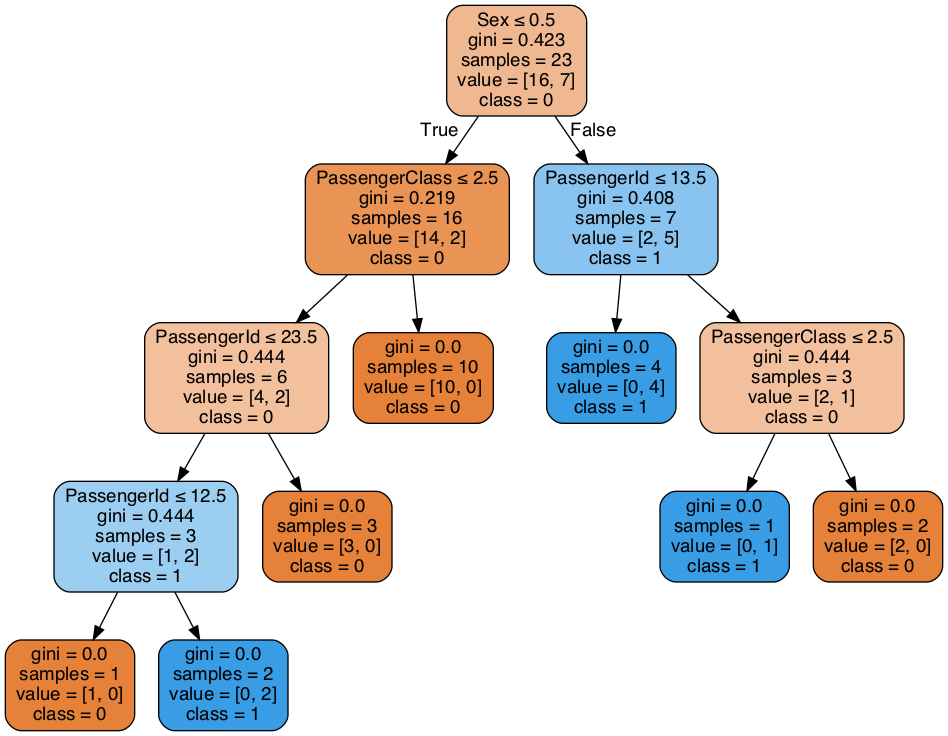

In [18]:
dot_data = StringIO()
feature_cols = list(data.columns.values)
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic_dt.png')
Image(graph.create_png())
